['60.287']
['2.123']


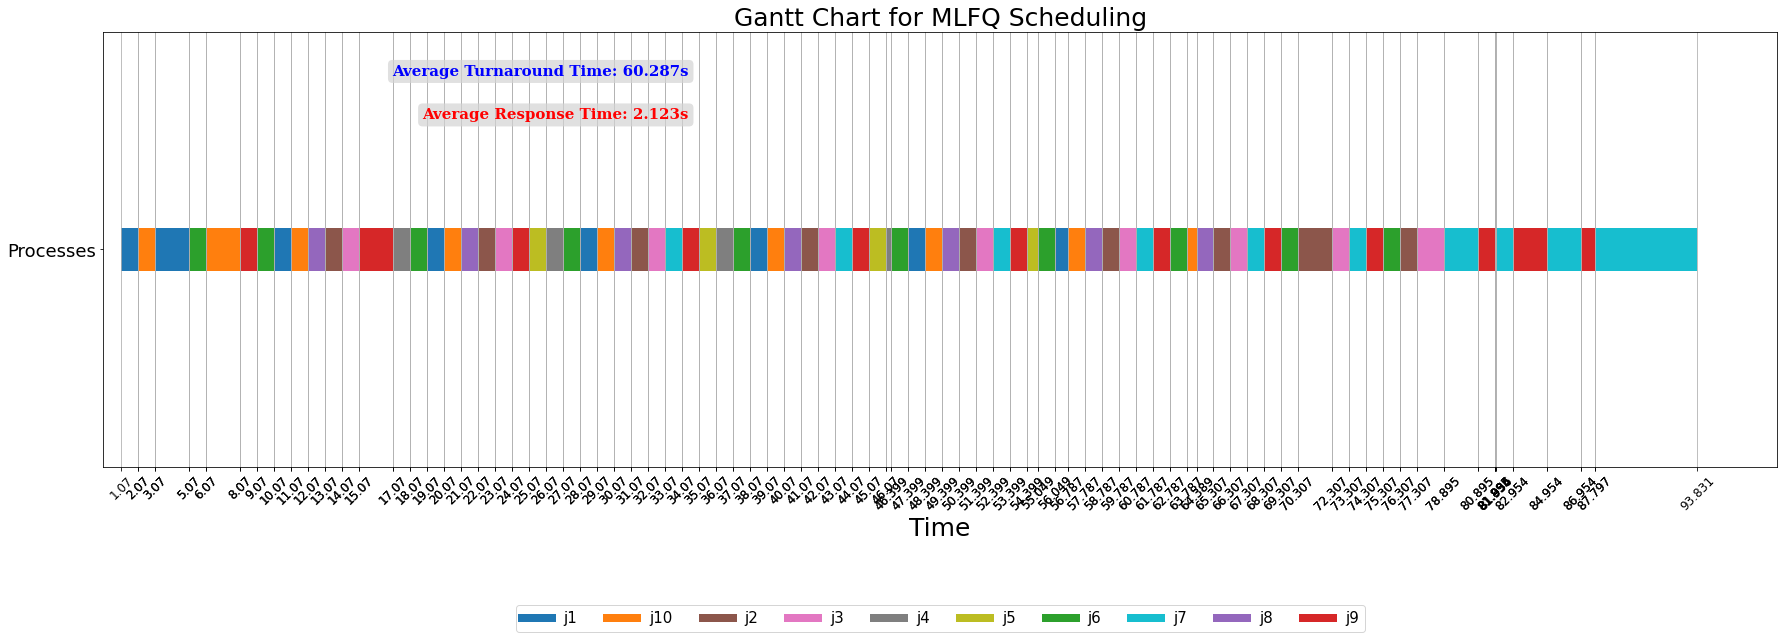

In [7]:
import matplotlib.pyplot as plt

# Function to parse the input file and extract job details
def parse_input_file(file_path):
    job_data = []
    with open(file_path, 'r') as file:
        lines = file.readlines()
        times = []
        for line in lines:
            parts = line.split()
            if len(parts) == 3:  # Check if it's a job description line
                job_id = parts[0]
                start_time = float(parts[1])
                end_time = float(parts[2])
                job_data.append((job_id, start_time, end_time))
            elif len(parts) == 1:
                print(parts)
                parts[0].strip()
                times.append(parts[0])
        AverageTurnaroundTime = times[0]
        AverageResponseTime = times[1]
    return (job_data, AverageTurnaroundTime, AverageResponseTime)

# Create a Gantt chart with unique colors and a legend for processes
def create_gantt_chart(job_data, AverageTurnaroundTime, AverageResponseTime):
    fig, ax = plt.subplots(figsize=(30, 8))

    # Set the y-axis limits and labels
    ax.set_ylim(0, 1)
    ax.set_yticks([0.5])
    ax.set_yticklabels(["Processes"], fontsize=18)

    # Create a dictionary to map process IDs to unique colors
    process_colors = {}
    unique_labels = set()

    # Track the time points where processes change
    time_points = []

    # Plot the scheduling intervals
    counter = 0
    for i, (job_id, start_time, end_time) in enumerate(job_data):
        if job_id not in process_colors:
            # Assign a unique color to the process if it's appearing for the first time
            process_colors[job_id] = f'C{counter % 10}'  # Use different colors for each process
            counter += 1
        color = process_colors[job_id]

        # Plot the process on the timeline
        width = end_time - start_time
        ax.barh(0.5, width, left=start_time, height=0.1, align='center', color=color)

        # Track time points
        time_points.extend([start_time, end_time])

        if job_id not in unique_labels:
            unique_labels.add(job_id)
            ax.barh(0, 0, color=color, label=job_id)
            
    sorted_labels = sorted(unique_labels)
    # Customize the plot
    ax.set_xlabel("Time", fontsize=25)
    ax.set_title("Gantt Chart for MLFQ Scheduling", fontsize=25)

    # Create a legend with unique process labels
    # ax.legend(loc='upper right',fontsize=10)
    # ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.3), ncol=10,fontsize=15)
    ax.legend(handles=[plt.Line2D([0], [0], color=process_colors[label], label=label, linewidth=8) for label in sorted_labels], loc='upper center', bbox_to_anchor=(0.5, -0.3), ncol=len(sorted_labels), fontsize=15)

    # Display the Gantt chart
    plt.grid(axis='x')

    # Add time labels to the x-axis at process change points
    ax.set_xticks(time_points)
    ax.set_xticklabels([str(time) for time in time_points], rotation=45, fontsize=12)  # Rotate x-axis labels for readability
    
    # Add turnaround time and response time as annotations below the x-axis
    ax.annotate(
        f'Average Turnaround Time: {AverageTurnaroundTime}s',
        xy=(0.35, 0.9),
        xycoords='axes fraction',
        ha='right',
        fontsize=15,
        fontweight='bold',  # Adjust font weight
        fontfamily='serif',  # Specify font family (e.g., 'serif', 'sans-serif')
        color='blue',  # Text color
        bbox=dict(boxstyle='round', facecolor='lightgray', edgecolor='none', alpha=0.7)
    )

    ax.annotate(
        f'Average Response Time: {AverageResponseTime}s',
        xy=(0.35, 0.8),
        xycoords='axes fraction',
        ha='right',
        fontsize=15,
        fontweight='bold',  # Adjust font weight
        fontfamily='serif',  # Specify font family (e.g., 'serif', 'sans-serif')
        color='Red',  # Text color
        bbox=dict(boxstyle='round', facecolor='lightgray', edgecolor='none', alpha=0.7)
    )
    plt.show()

# Main function
if __name__ == "__main__":
    input_file = "gantt_data.txt"  # Replace with the actual file path
    (job_data, AverageTurnaroundTime, AverageResponseTime) = parse_input_file(input_file)
    create_gantt_chart(job_data, AverageTurnaroundTime, AverageResponseTime)